In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [61]:
X_train = pd.read_csv('data/train_features.csv')
X_test = pd.read_csv('data/test_features.csv')
y_train = pd.read_csv('data/train_targets_scored.csv')

X_train = X_train.drop('sig_id', axis=1)
X_test = X_test.drop('sig_id', axis=1)
y_train = y_train.drop('sig_id', axis=1)

In [37]:
X_train.head(5)

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [73]:
y_train.head(5)

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#all(X_train['sig_id'] == y_train['sig_id'])
for target in y_train.columns.values:
    nz = sum(y_train[target])
    print(f"Number of nonzero entries in '{target}': {nz}")

Number of nonzero entries in '5-alpha_reductase_inhibitor': 17
Number of nonzero entries in '11-beta-hsd1_inhibitor': 18
Number of nonzero entries in 'acat_inhibitor': 24
Number of nonzero entries in 'acetylcholine_receptor_agonist': 190
Number of nonzero entries in 'acetylcholine_receptor_antagonist': 301
Number of nonzero entries in 'acetylcholinesterase_inhibitor': 73
Number of nonzero entries in 'adenosine_receptor_agonist': 54
Number of nonzero entries in 'adenosine_receptor_antagonist': 96
Number of nonzero entries in 'adenylyl_cyclase_activator': 12
Number of nonzero entries in 'adrenergic_receptor_agonist': 270
Number of nonzero entries in 'adrenergic_receptor_antagonist': 360
Number of nonzero entries in 'akt_inhibitor': 66
Number of nonzero entries in 'aldehyde_dehydrogenase_inhibitor': 7
Number of nonzero entries in 'alk_inhibitor': 42
Number of nonzero entries in 'ampk_activator': 12
Number of nonzero entries in 'analgesic': 12
Number of nonzero entries in 'androgen_recepto

Number of nonzero entries in 'sigma_receptor_agonist': 36
Number of nonzero entries in 'sigma_receptor_antagonist': 36
Number of nonzero entries in 'smoothened_receptor_antagonist': 25
Number of nonzero entries in 'sodium_channel_inhibitor': 267
Number of nonzero entries in 'sphingosine_receptor_agonist': 25
Number of nonzero entries in 'src_inhibitor': 71
Number of nonzero entries in 'steroid': 6
Number of nonzero entries in 'syk_inhibitor': 19
Number of nonzero entries in 'tachykinin_antagonist': 60
Number of nonzero entries in 'tgf-beta_receptor_inhibitor': 30
Number of nonzero entries in 'thrombin_inhibitor': 19
Number of nonzero entries in 'thymidylate_synthase_inhibitor': 37
Number of nonzero entries in 'tlr_agonist': 30
Number of nonzero entries in 'tlr_antagonist': 7
Number of nonzero entries in 'tnf_inhibitor': 36
Number of nonzero entries in 'topoisomerase_inhibitor': 127
Number of nonzero entries in 'transient_receptor_potential_channel_antagonist': 18
Number of nonzero entr

In [6]:
X_train.columns.values

array(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2',
       'g-3', 'g-4', 'g-5', 'g-6', 'g-7', 'g-8', 'g-9', 'g-10', 'g-11',
       'g-12', 'g-13', 'g-14', 'g-15', 'g-16', 'g-17', 'g-18', 'g-19',
       'g-20', 'g-21', 'g-22', 'g-23', 'g-24', 'g-25', 'g-26', 'g-27',
       'g-28', 'g-29', 'g-30', 'g-31', 'g-32', 'g-33', 'g-34', 'g-35',
       'g-36', 'g-37', 'g-38', 'g-39', 'g-40', 'g-41', 'g-42', 'g-43',
       'g-44', 'g-45', 'g-46', 'g-47', 'g-48', 'g-49', 'g-50', 'g-51',
       'g-52', 'g-53', 'g-54', 'g-55', 'g-56', 'g-57', 'g-58', 'g-59',
       'g-60', 'g-61', 'g-62', 'g-63', 'g-64', 'g-65', 'g-66', 'g-67',
       'g-68', 'g-69', 'g-70', 'g-71', 'g-72', 'g-73', 'g-74', 'g-75',
       'g-76', 'g-77', 'g-78', 'g-79', 'g-80', 'g-81', 'g-82', 'g-83',
       'g-84', 'g-85', 'g-86', 'g-87', 'g-88', 'g-89', 'g-90', 'g-91',
       'g-92', 'g-93', 'g-94', 'g-95', 'g-96', 'g-97', 'g-98', 'g-99',
       'g-100', 'g-101', 'g-102', 'g-103', 'g-104', 'g-105', 'g-106',
      

In [62]:
g_cols = [col for col in X_train.columns.values if col.startswith('g-')]
print(len(g_cols))
c_cols = [col for col in X_train.columns.values if col.startswith('c-')]
print(len(c_cols))
gc_cols = g_cols + c_cols
gc_feats = X_train[gc_cols]
gc_feats.head(5)

772
100


,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [63]:
# First, standardize the data so we can compute the covariance matrix, etc.
gc_feats -= np.mean(gc_feats, axis=0)
gc_feats /= np.std(gc_feats, axis=0)

# TODO: Should we be computing skewness/kurtosis to see if we need to apply a log transform to any of the data beforehand?

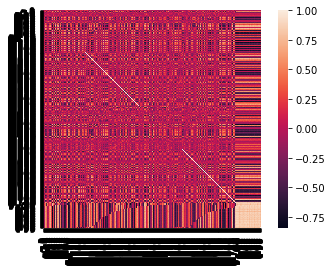

In [64]:
cov_matrix = np.cov(gc_feats, rowvar=False)

hm = sns.heatmap(cov_matrix,
                 square=True,
                 yticklabels=gc_cols,
                 xticklabels=gc_cols)
# We can see that there's high positive correlation between
# most cell features, and high positive/negative correlation between
# cell features and some gene features.

In [65]:
# Run PCA to shrink the number of features
Lambda, V = np.linalg.eig(cov_matrix)
#print(len(Lambda))

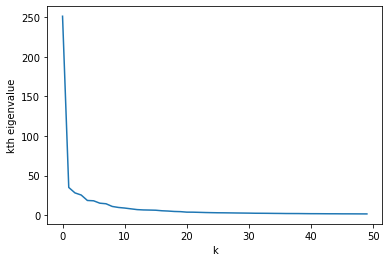

Percentage of variance explained: 64.2451305917988


In [66]:
# Plot eigenvalues
k_lo, k_hi = 0,50
plt.xlabel('k')
plt.ylabel('kth eigenvalue')
plt.plot(range(k_lo, k_hi), np.real(Lambda[k_lo:k_hi]))
plt.show()

# How do eigenvalues correspond to percentages???
# Answer: the eigenvalues *are* the variances of each principal component feature.
print('Percentage of variance explained:', sum(Lambda[k_lo:k_hi]) / sum(Lambda) * 100)

In [67]:
k = 50 # Dimension we want to reduce the data to
pcs = V[:k].T
pc_cols = [f'pc_{i}' for i in range(k)]
gc_feats_reduced = pd.DataFrame(np.matmul(gc_feats.to_numpy(), pcs), columns=pc_cols)
gc_feats_reduced.head(5)

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_40,pc_41,pc_42,pc_43,pc_44,pc_45,pc_46,pc_47,pc_48,pc_49
0,-0.743870,-0.452714,-0.285179,0.517025,1.034158,-0.889787,1.050988,0.125035,0.193744,-0.814453,...,0.827875,0.867155,-0.301607,-0.645947,-0.184885,-0.056586,0.148888,-0.111281,-1.519345,0.057927
1,0.016479,-1.044760,-0.039587,1.282449,-0.468461,0.176405,1.060660,-0.180449,-0.160382,-0.806004,...,-0.901693,-1.000972,-1.204367,0.760640,0.810691,0.515273,-0.800596,0.959050,-0.600182,0.278910
2,0.184605,-0.713780,-0.700548,-1.494985,-0.612137,0.174884,1.131898,0.212674,-0.668937,-1.035698,...,-0.573349,-1.276446,0.016338,-0.206591,0.394077,0.325790,1.110493,0.012863,0.836237,0.339886
3,-0.364515,0.909532,-1.297843,-0.195220,-0.516206,0.703631,-0.949440,-0.969781,-1.910534,-0.428959,...,1.925370,-0.007894,0.754079,-0.830476,-0.457066,1.112415,1.077533,0.183013,1.322634,0.113499
4,-0.480568,2.359214,-1.117671,0.026728,0.429780,0.175737,-0.763136,0.316673,-0.829389,-2.766184,...,-0.869532,-0.465563,-1.191160,0.346277,-0.842187,-0.448012,-0.486279,-2.067930,0.883397,-1.409281


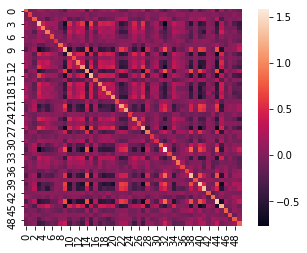

In [68]:
# There shouldn't be any correlated features in the reduced feature space
cov_matrix_reduced = np.cov(gc_feats_reduced, rowvar=False)

hm = sns.heatmap(cov_matrix_reduced,
                 square=True)

# Why isn't this working???

In [ ]:
# TODO: Do we want to do a scatter plot of the data projected to the first 2/3 pcs?

In [69]:
# Now that we've done PCA, let's train a model to do prediction
# The data is still pretty high-dimensional so we'll go for an SVM?
if 'g-0' in X_train.columns:
    X_train = X_train.drop(gc_cols, axis=1)
if 'pc_0' in X_train.columns:
    X_train = X_train.drop(pc_cols, axis=1)
X_train = pd.concat([X_train, gc_feats_reduced], axis=1)
X_train.head(5)

,cp_type,cp_time,cp_dose,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,...,pc_40,pc_41,pc_42,pc_43,pc_44,pc_45,pc_46,pc_47,pc_48,pc_49
0,trt_cp,24,D1,-0.743870,-0.452714,-0.285179,0.517025,1.034158,-0.889787,1.050988,...,0.827875,0.867155,-0.301607,-0.645947,-0.184885,-0.056586,0.148888,-0.111281,-1.519345,0.057927
1,trt_cp,72,D1,0.016479,-1.044760,-0.039587,1.282449,-0.468461,0.176405,1.060660,...,-0.901693,-1.000972,-1.204367,0.760640,0.810691,0.515273,-0.800596,0.959050,-0.600182,0.278910
2,trt_cp,48,D1,0.184605,-0.713780,-0.700548,-1.494985,-0.612137,0.174884,1.131898,...,-0.573349,-1.276446,0.016338,-0.206591,0.394077,0.325790,1.110493,0.012863,0.836237,0.339886
3,trt_cp,48,D1,-0.364515,0.909532,-1.297843,-0.195220,-0.516206,0.703631,-0.949440,...,1.925370,-0.007894,0.754079,-0.830476,-0.457066,1.112415,1.077533,0.183013,1.322634,0.113499
4,trt_cp,72,D2,-0.480568,2.359214,-1.117671,0.026728,0.429780,0.175737,-0.763136,...,-0.869532,-0.465563,-1.191160,0.346277,-0.842187,-0.448012,-0.486279,-2.067930,0.883397,-1.409281


In [12]:
list(set(X_train['cp_time']))

[24, 48, 72]

In [13]:
list(set(X_train['cp_dose']))

['D1', 'D2']

In [14]:
list(set(X_train['cp_type']))

['ctl_vehicle', 'trt_cp']

In [70]:
cp_cols = ['cp_type', 'cp_time', 'cp_dose']
X_train = pd.get_dummies(X_train, columns=cp_cols)

In [71]:
X_train.head(5)

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_47,pc_48,pc_49,cp_type_ctl_vehicle,cp_type_trt_cp,cp_time_24,cp_time_48,cp_time_72,cp_dose_D1,cp_dose_D2
0,-0.743870,-0.452714,-0.285179,0.517025,1.034158,-0.889787,1.050988,0.125035,0.193744,-0.814453,...,-0.111281,-1.519345,0.057927,0,1,1,0,0,1,0
1,0.016479,-1.044760,-0.039587,1.282449,-0.468461,0.176405,1.060660,-0.180449,-0.160382,-0.806004,...,0.959050,-0.600182,0.278910,0,1,0,0,1,1,0
2,0.184605,-0.713780,-0.700548,-1.494985,-0.612137,0.174884,1.131898,0.212674,-0.668937,-1.035698,...,0.012863,0.836237,0.339886,0,1,0,1,0,1,0
3,-0.364515,0.909532,-1.297843,-0.195220,-0.516206,0.703631,-0.949440,-0.969781,-1.910534,-0.428959,...,0.183013,1.322634,0.113499,0,1,0,1,0,1,0
4,-0.480568,2.359214,-1.117671,0.026728,0.429780,0.175737,-0.763136,0.316673,-0.829389,-2.766184,...,-2.067930,0.883397,-1.409281,0,1,0,0,1,0,1


In [72]:
from sklearn.model_selection import train_test_split

X_fit, X_val, y_fit, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [79]:
from sklearn import metrics
from sklearn import base
from sklearn.utils import resample

def train(model):
    print(type(model).__name__)
    for target in y_fit.columns.values:
        model2 = base.clone(model)
        
        # Perform upsampling because the positive labels are so imbalanced
        targets = y_fit[target]
        X_fit_0 = X_fit[targets == 0]
        X_fit_1 = X_fit[targets == 1]
        
        new_X_fit_1 = resample(X_fit_1, n_samples=X_fit_0.shape[0], random_state=0)
        new_X_fit = pd.concat([X_fit_0, new_X_fit_1], axis=0)
        new_y_fit = np.concatenate([np.zeros((X_fit_0.shape[0],)), np.ones((X_fit_0.shape[0],))], axis=0)
        
        model2.fit(new_X_fit, new_y_fit)
        y_pred = model2.predict(X_val)
        mets = {
            #'acc': metrics.accuracy_score(y_val[target], y_pred), # worthless
            'prec': metrics.precision_score(y_val[target], y_pred),
            'rec': metrics.recall_score(y_val[target], y_pred),
            'f1': metrics.f1_score(y_val[target], y_pred)
        }
        print(f'\t{target}:', ' '.join([f'{name} {val}' for name, val in mets.items()]))

#from sklearn.linear_model import LogisticRegression
#print(X_fit.dtypes)
#train(LogisticRegression())

from sklearn.svm import SVC
train(SVC())

SVC


c:\users\james\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	5-alpha_reductase_inhibitor: prec 0.0 rec 0.0 f1 0.0


c:\users\james\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	11-beta-hsd1_inhibitor: prec 0.0 rec 0.0 f1 0.0


KeyboardInterrupt: 